In [1]:
import uproot as up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak
import os

In [2]:
import sys
sys.path.append("/remote/gpu03/schiller/JetCalibration")

In [3]:
path_data_folder = "/remote/gpu07/huetsch/JetCalibration/data_v2"

files = os.listdir(path_data_folder)
files = [file for file in files if file.endswith(".npy") and "full_data" not in file]
print(len(files))

83


In [15]:
n_files = 1

files = files[:n_files]
# files = files[-n_files:]

target_data = []
input_data = []

for i in range(len(files)):
    file = os.path.join(path_data_folder, files[i])
    data_i = np.load(file)
    nan_mask = np.isnan(data_i).any(axis=1)
    inf_mask = np.isinf(data_i).any(axis=1)
    data_i = data_i[~nan_mask & ~inf_mask]

    target_data.append(data_i[:, :2])
    input_data.append(data_i[:, 2:])

target_data = np.concatenate(target_data, axis=0)
input_data = np.concatenate(input_data, axis=0)

print(f"target_data: {target_data.shape}")
print(f"input_data: {input_data.shape}")

min_values = np.min(target_data, axis=0)
max_values = np.max(target_data, axis=0)

print(f"min_values: {min_values}")
print(f"max_values: {max_values}")


target_data: (5115039, 2)
input_data: (5115039, 21)
min_values: [-0.7195312 -1.5832283]
max_values: [0.47241348 1.3712578 ]


# Response correlations

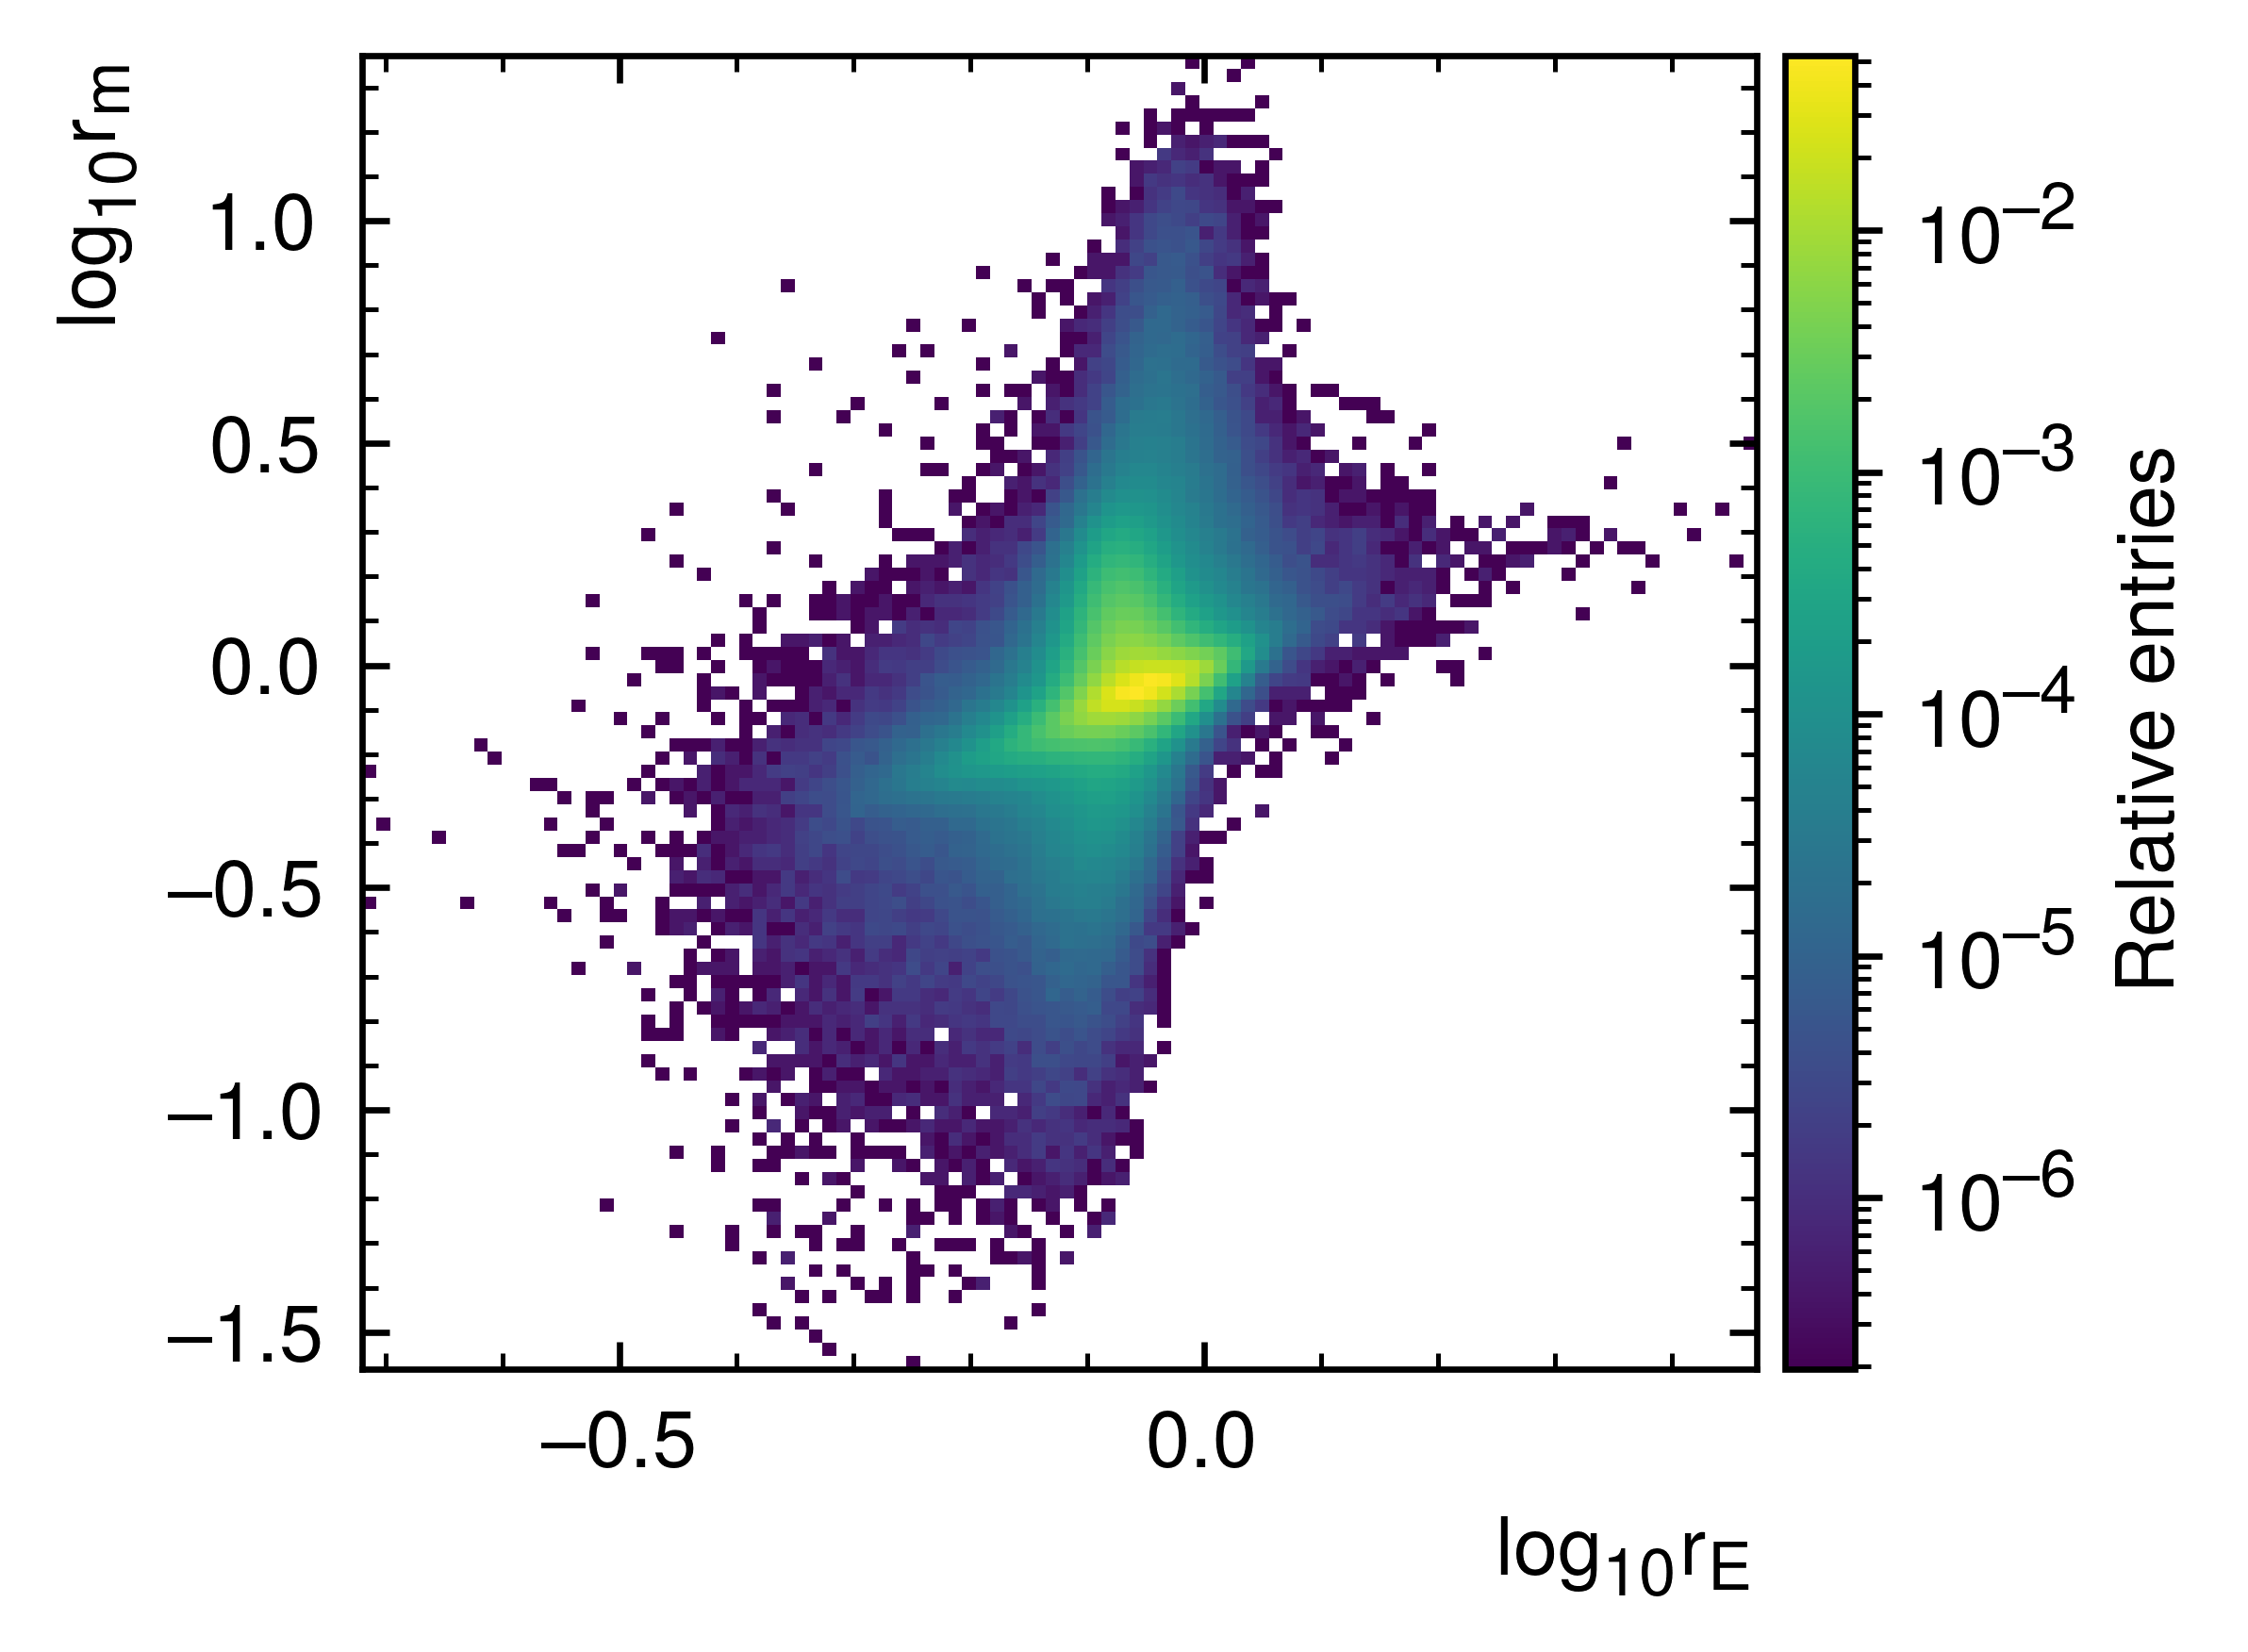

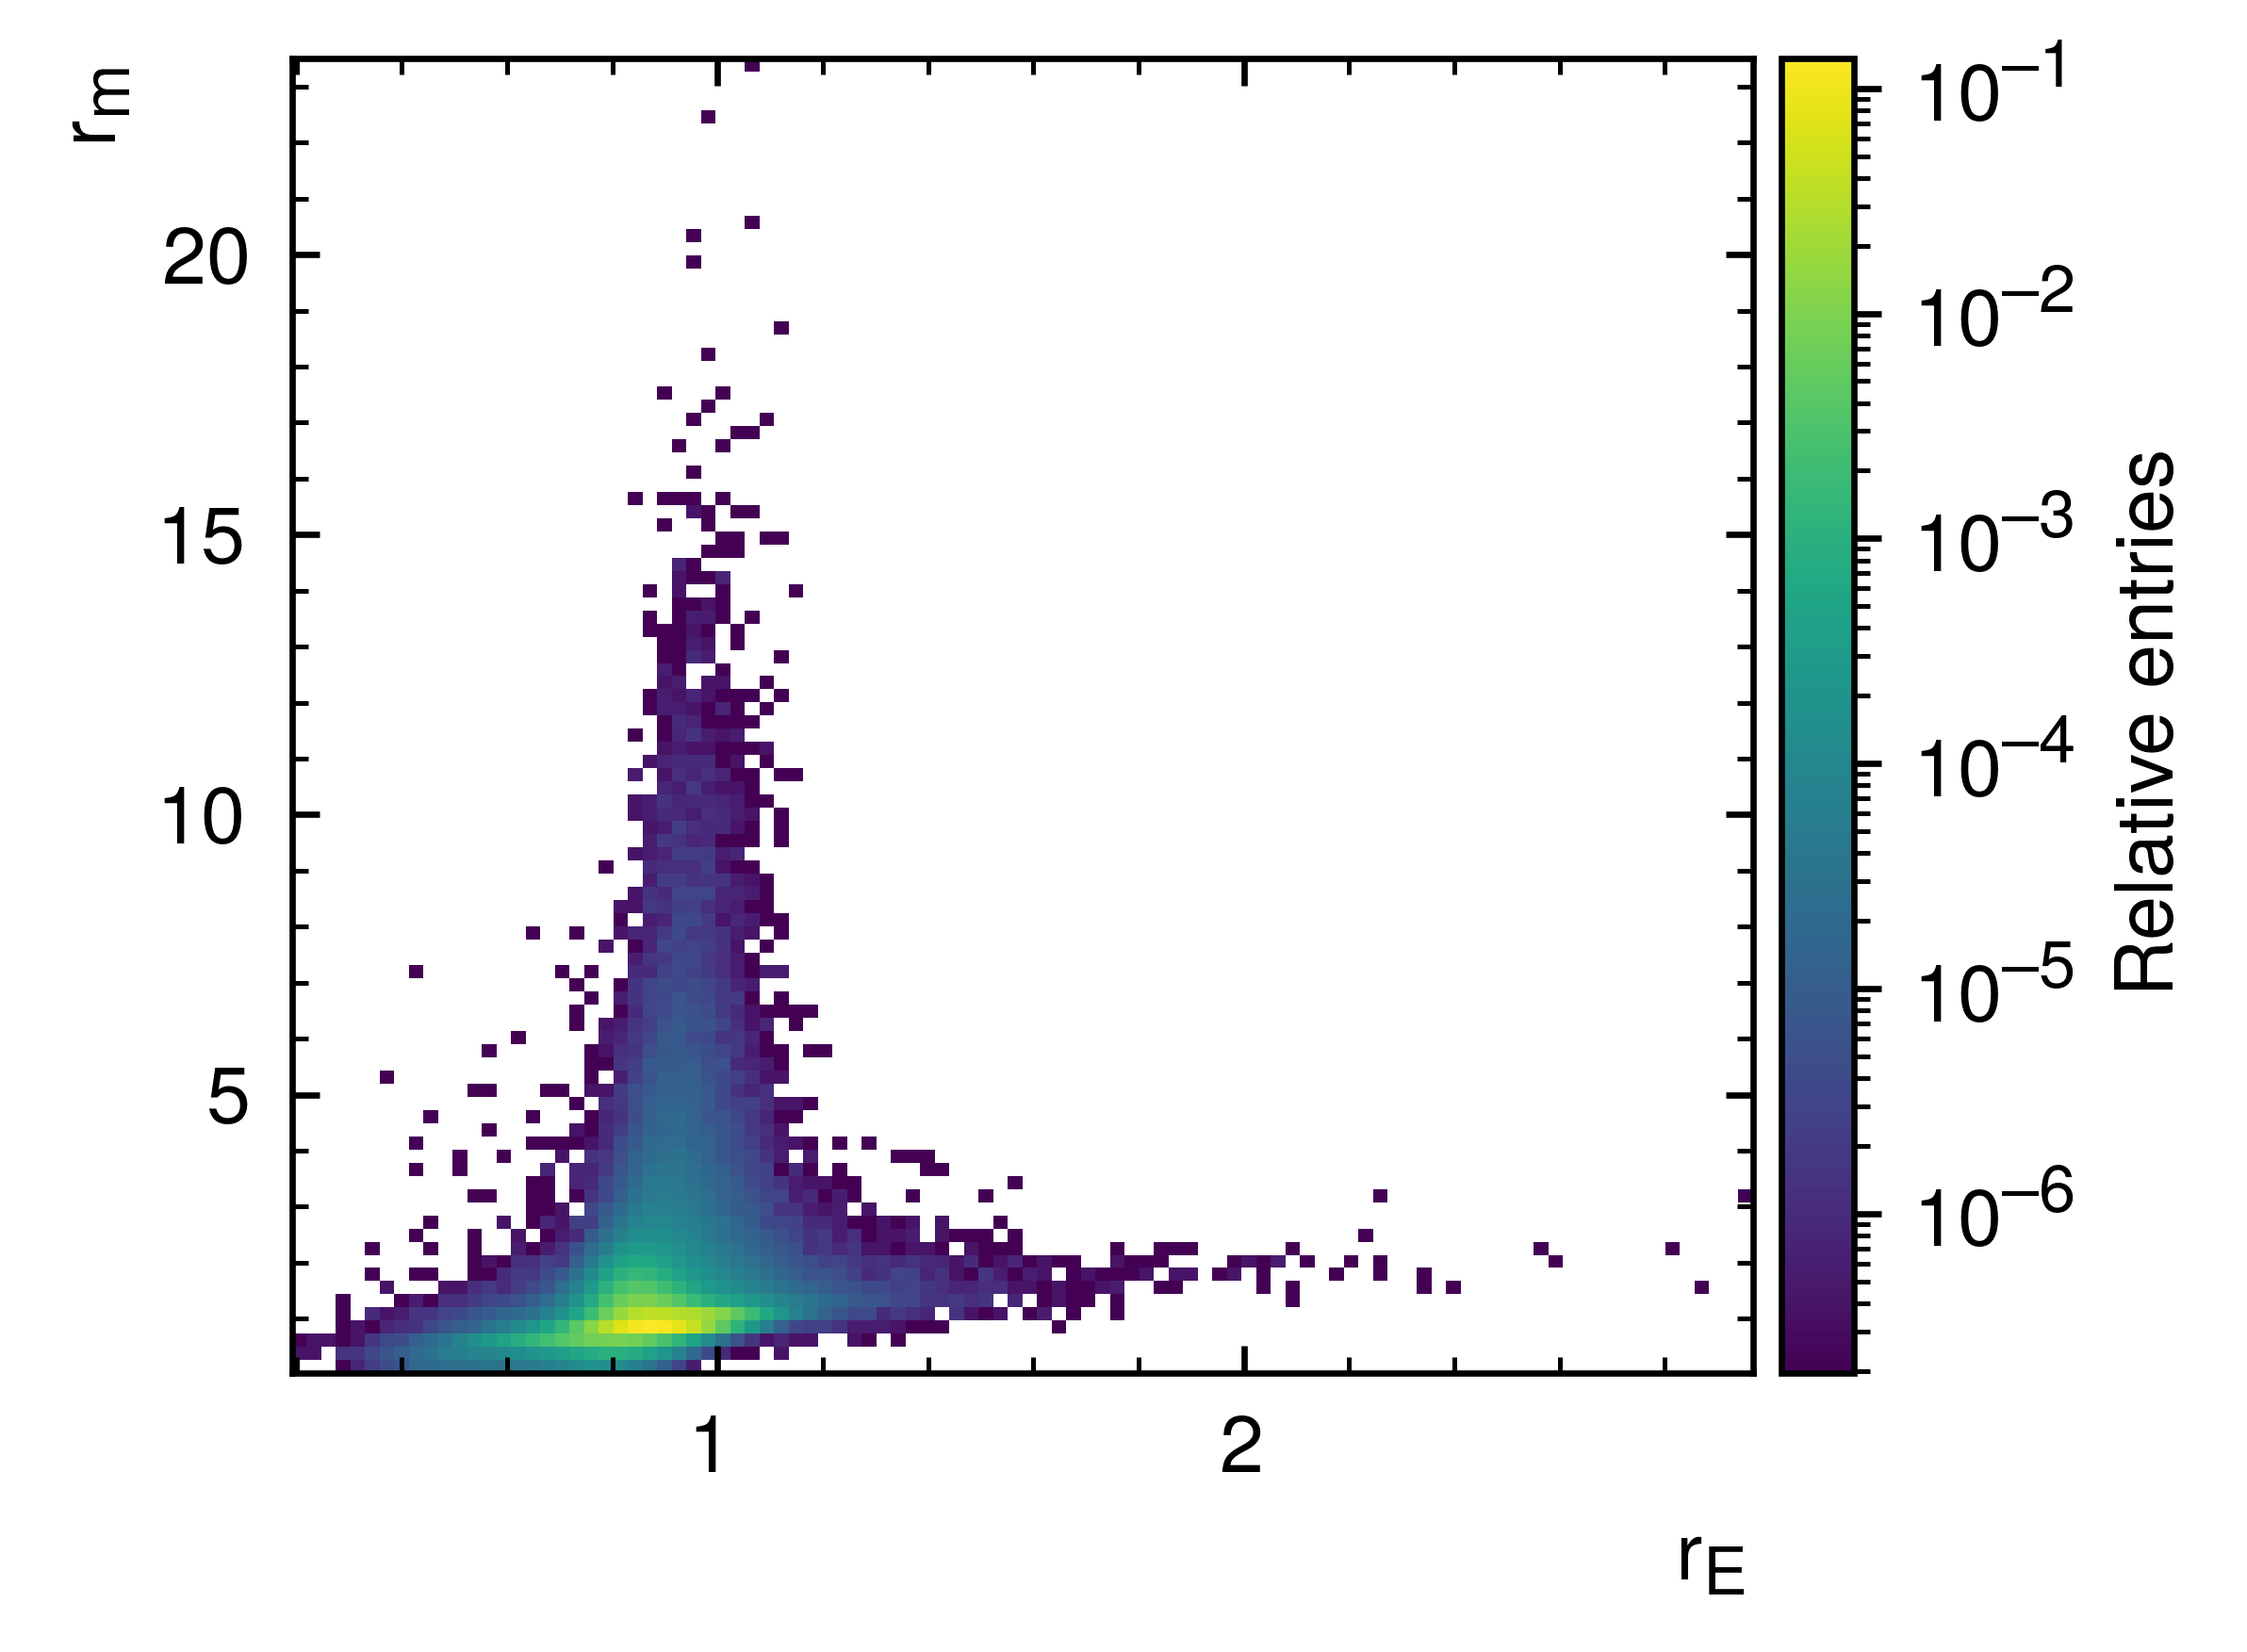

In [5]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[target_data[:,0], target_data[:,1]],
    labels=[r"$\text{log}_{10} r_E$", r"$\text{log}_{10} r_m$"],
    ranges=[[min_values[0], max_values[0]], [min_values[1], max_values[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[np.pow(10., target_data[:,0]), np.pow(10., target_data[:,1])],
    labels=[r"$r_E$", r"$r_m$"],
    ranges=[[np.power(10., min_values[0]), np.power(10., max_values[0])], [np.power(10., min_values[1]), np.power(10., max_values[1])]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/target_correlations.pdf")

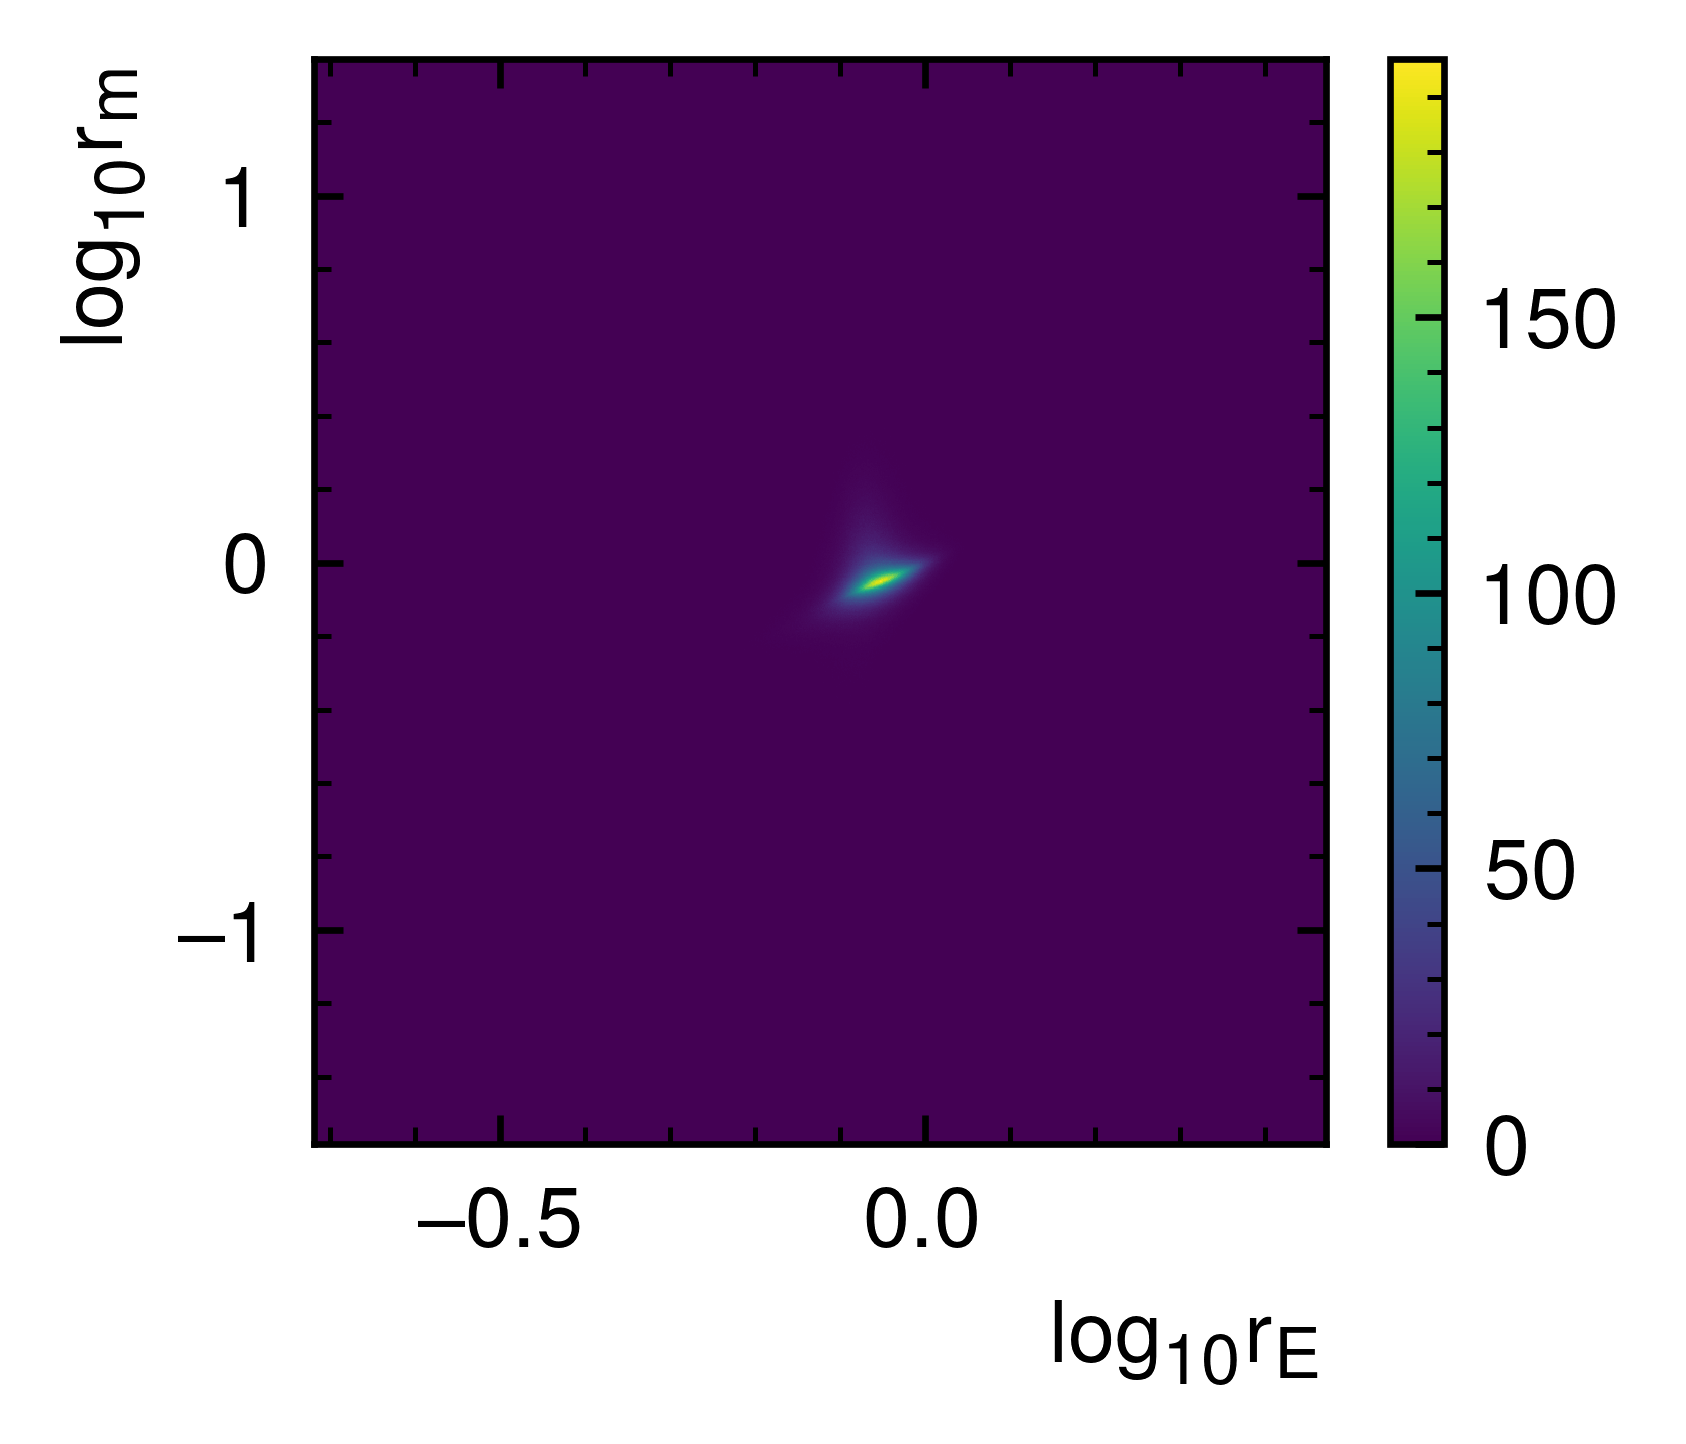

In [6]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()

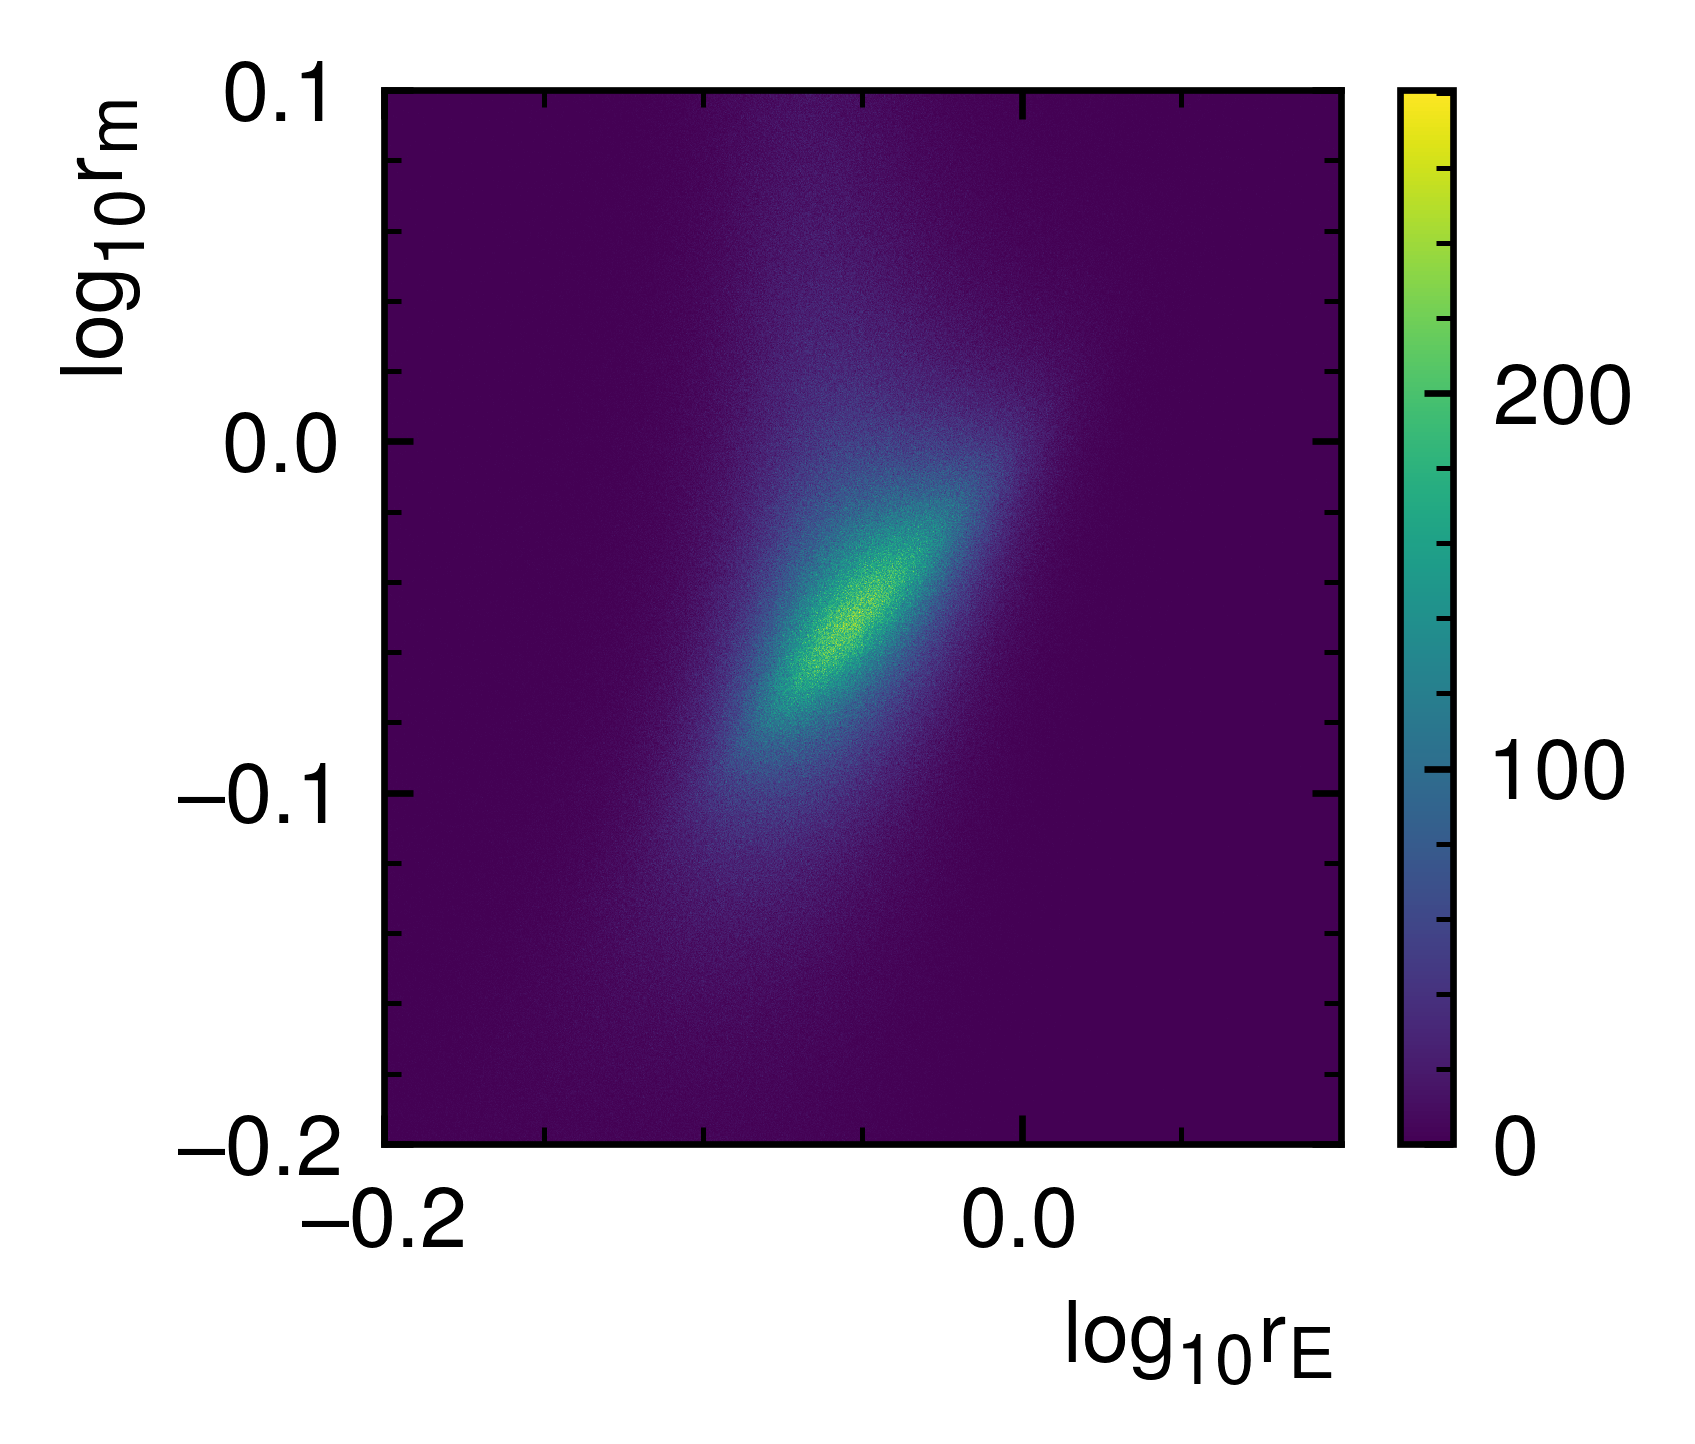

In [7]:
plt.figure()

plt.hist2d(target_data[:,0], target_data[:,1], range=[[-0.2, 0.1], [-0.2, 0.1]], bins=1000, density=True)
plt.xlabel(r"$\text{log}_{10} r_E$")
plt.ylabel(r"$\text{log}_{10} r_m$")

plt.colorbar()
plt.tight_layout()

# Jet correlations

In [16]:
r = 10**target_data
vals = (1./r) * input_data[:, :2]
vals_log = np.log10(vals)

min_vals = np.min(vals, axis=0)
max_vals = np.max(vals, axis=0)
print(f"min_vals: {min_vals}")
print(f"max_vals: {max_vals}")

min_vals_log = np.min(vals_log, axis=0)
max_vals_log = np.max(vals_log, axis=0)
print(f"min_vals_log: {min_vals_log}")
print(f"max_vals_log: {max_vals_log}")

min_vals: [94.656685 50.000004]
max_vals: [6163.     2527.3958]
min_vals_log: [1.9761512 1.6989701]
max_vals_log: [3.789792  3.4026732]


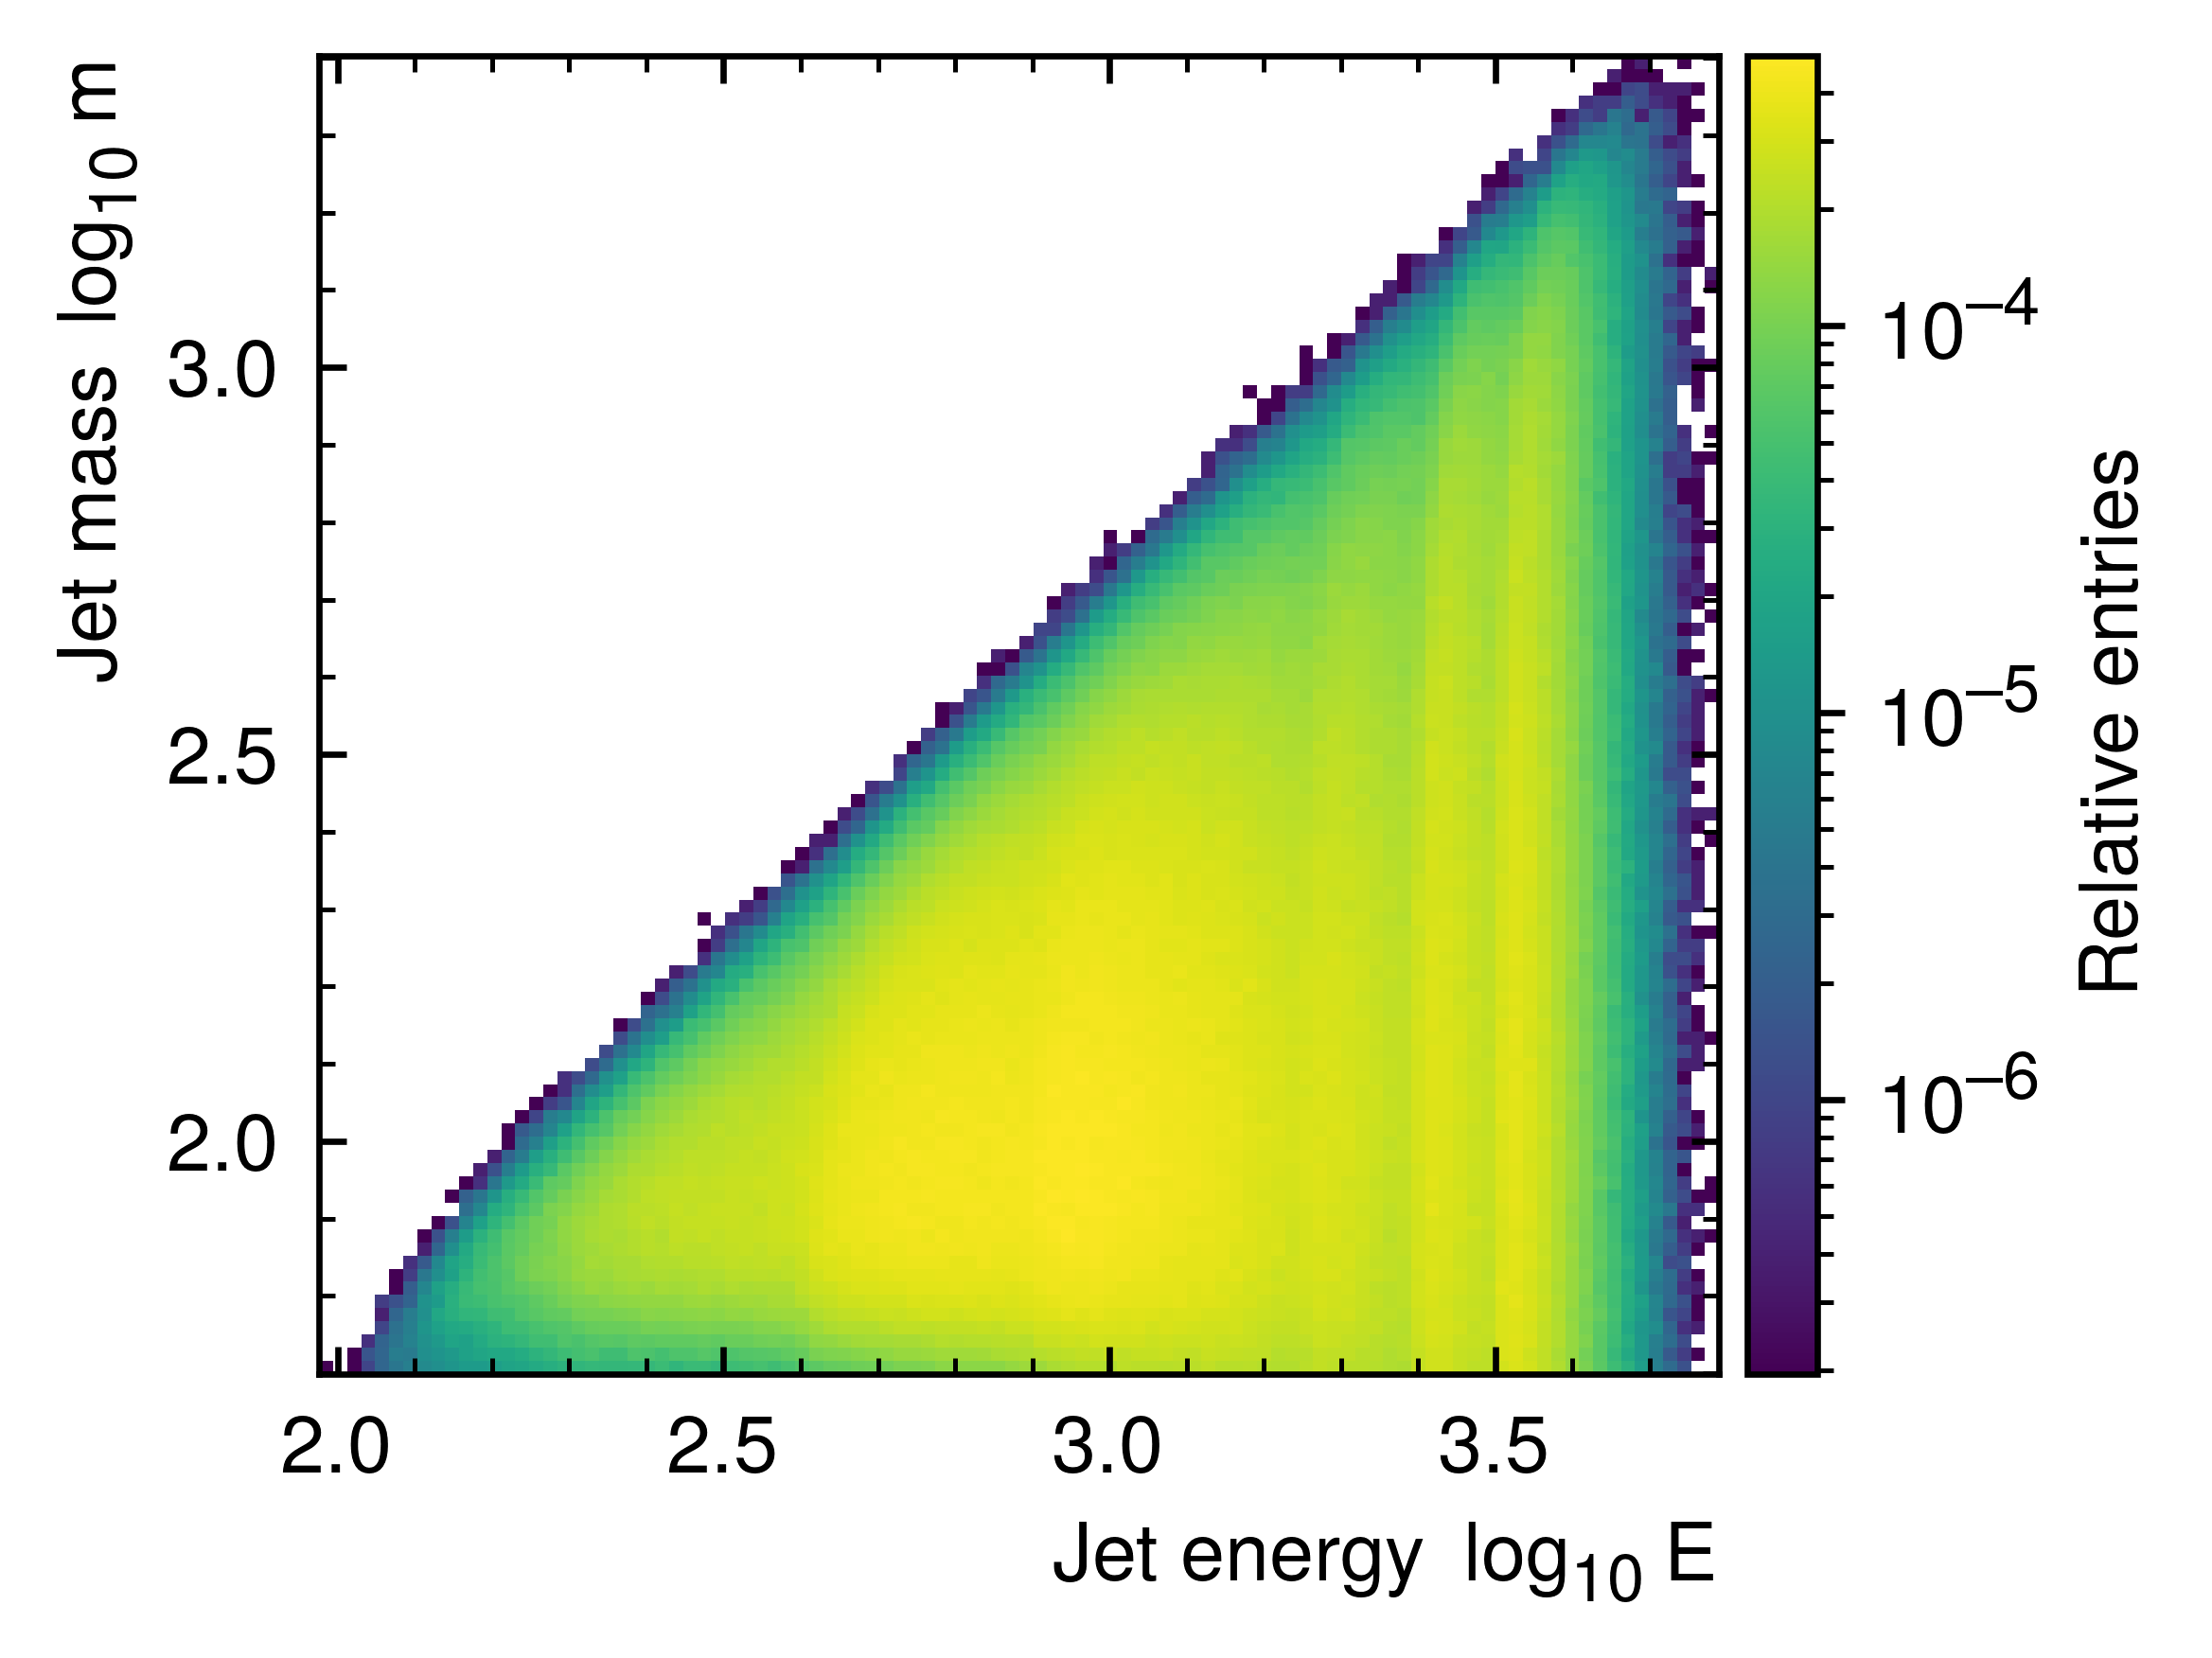

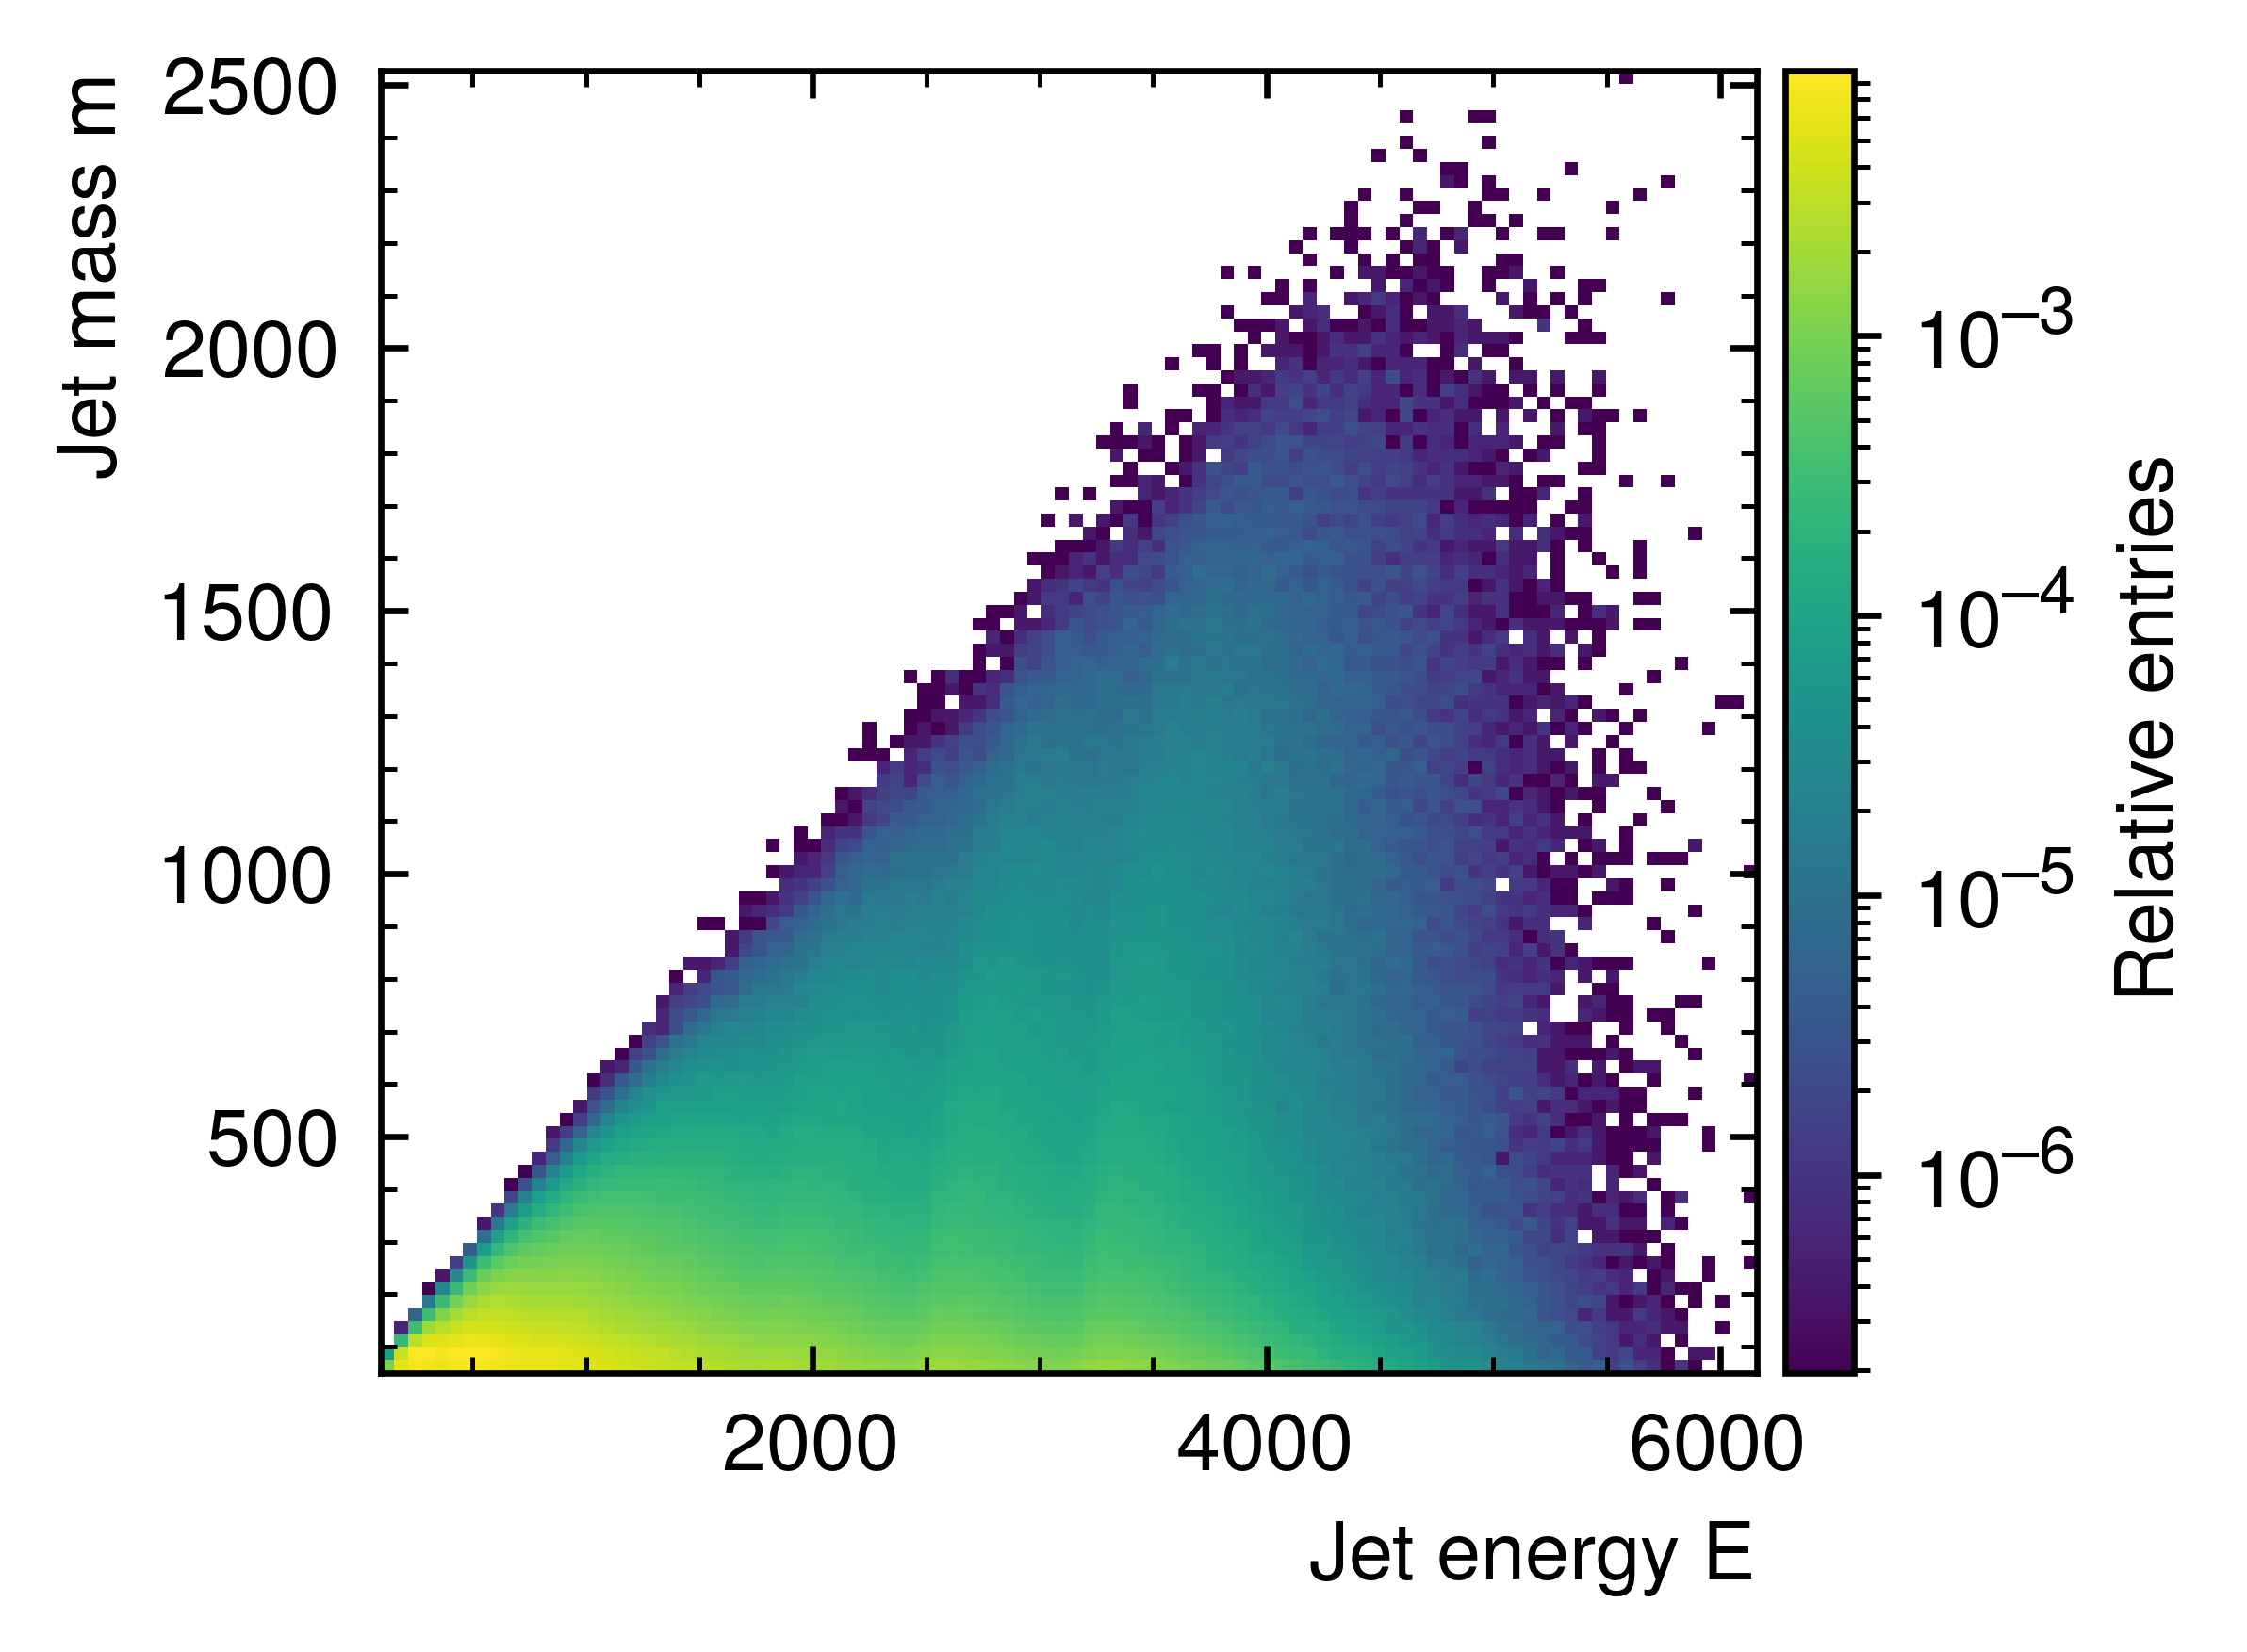

In [17]:
from Source.plots import make_hist_2dim

plt.close()

fig, axs = make_hist_2dim(
    data=[vals_log[:,0], vals_log[:,1]],
    labels=[r"$\text{Jet energy } \log_{10} E$", r"$\text{Jet mass } \log_{10} m$"],
    ranges=[[min_vals_log[0], max_vals_log[0]], [min_vals_log[1], max_vals_log[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_correlations_log.pdf")

plt.close()

fig, axs = make_hist_2dim(
    data=[vals[:, 0], vals[:, 1]],
    labels=[r"$\text{Jet energy } E$", r"$\text{Jet mass } m$"],
    ranges=[[min_vals[0], max_vals[0]], [min_vals[1], max_vals[1]]],
    showdiag=False,
    nbins=[100,100],
    norm_rows=False
)

fig.tight_layout()
plt.show()
fig.savefig("/remote/gpu03/schiller/JetCalibration/results/vis_data/jet_correlations.pdf")